In [3]:
# Install rasterio - package to calculate vegatation index
! pip install rasterio



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 53.1 MB/s eta 0:00:00


In [1]:
# Connect colab to google drive to fetch the tif file for nvid band fetch.
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Landsat8/"


Mounted at /content/drive


In [4]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



In [5]:
#import bands as separate 1 band raster,
# open files - LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif & LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif
band4 = rasterio.open(path + 'LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif')
band5 = rasterio.open(path + 'LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif')


In [6]:

#number of raster rows
band4.height

#number of raster columns
band4.width


2107

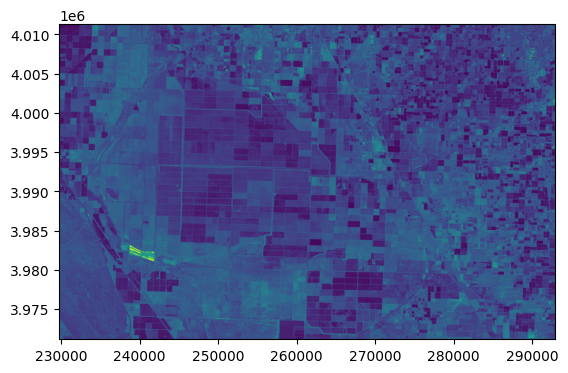

<Axes: >

In [8]:

#plot band
plot.show(band4)



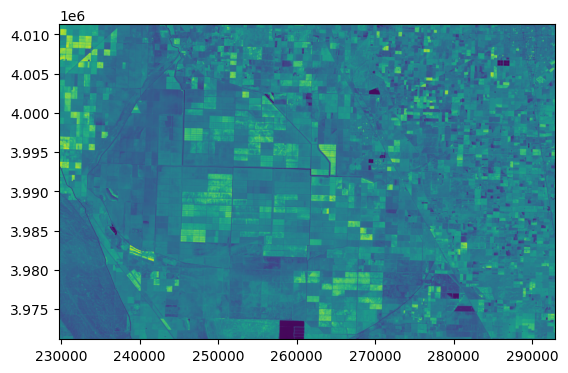

<Axes: >

In [23]:
plot.show(band5)

In [12]:
band4.dtypes[0]

'uint16'

In [14]:
band4.crs
band4.transform

Affine(30.0, 0.0, 229755.0,
       0.0, -30.0, 4011285.0)

In [19]:
band4.read(1)

array([[ 7479,  7474,  7472, ...,  8970,  9186,  9849],
       [ 7482,  7488,  7477, ...,  9048,  9151,  9667],
       [ 7497,  7468,  7454, ...,  9115,  9150, 10156],
       ...,
       [17295, 16415, 16222, ..., 11569, 11376, 11254],
       [17162, 16303, 15322, ..., 11617, 11278, 11115],
       [16905, 16026, 15720, ..., 12508, 12893, 13168]], dtype=uint16)

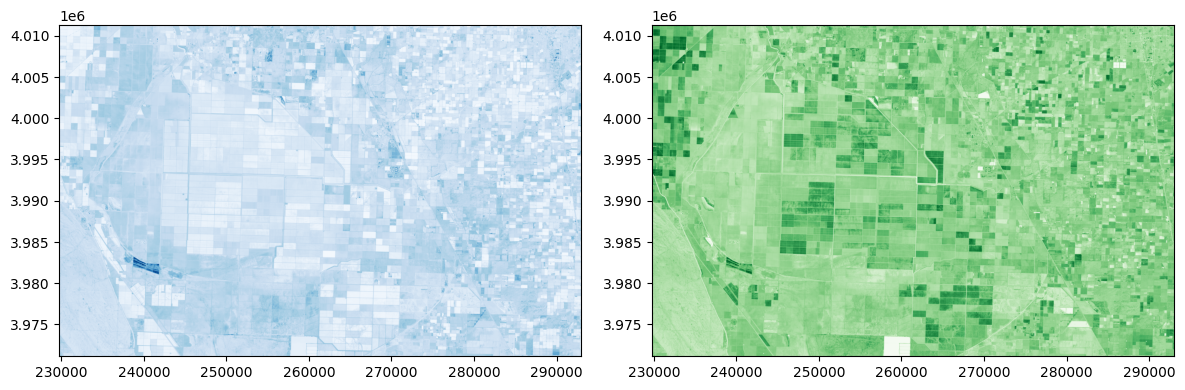

In [22]:

#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Blues')
plot.show(band5, ax=ax2, cmap='Greens')
fig.tight_layout()


In [24]:
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')


In [27]:

#ndvi calculation, empty cells or nodata cells are reported as 0
ndvi = np.where(
    (nir+red) == 0.,
    0,
    (nir-red)/(nir+red))
ndvi[:5,:5]


array([[0.52601559, 0.525987  , 0.5271335 , 0.52442396, 0.52136479],
       [0.52721873, 0.52758588, 0.52751975, 0.5246888 , 0.52311125],
       [0.52774803, 0.53187488, 0.52999779, 0.52700989, 0.52593861],
       [0.53090761, 0.52997044, 0.52947468, 0.52603985, 0.52432536],
       [0.5317881 , 0.52931154, 0.53190956, 0.52842704, 0.52400689]])

In [28]:
#export ndvi image
ndviImage = rasterio.open('/content/sample_data/ndvi.tiff','w',driver='Gtiff',
                          width=band4.width, height = band4.height,
                          count=1, crs=band4.crs, transform=band4.transform,
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()



In [ ]:
#plot ndvi
